In [1]:
import pandas as pd
import numpy as np

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [3]:
l=[ i for i in range(1,10)]


f = open("data_int.txt", "w")
for item in l: f.write("%s\n" % item)
f.close()

g = open("data_float.txt", "w")
m=(np.random.rand(5,5))/5
np.savetxt(g,m)
g.close()

import csv
with open("data_float.txt", "r") as read_matrix, open("data_float.csv", "w") as out_matrix:
        reader = csv.reader(read_matrix, delimiter=' ')
        dialect = csv.excel
        writer = csv.writer(out_matrix)
        writer.writerows(reader)

with open("data_int.txt", "r") as read_list, open("data_int.csv", "w") as out_list:
        reader = csv.reader(read_list)
        dialect = csv.excel
        writer = csv.writer(out_list)
        writer.writerows(reader)        
! type "data_int.txt
"

1
2
3
4
5
6
7
8
9


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [62]:
import json # import the JSON module
df = pd.read_json('user_data.json')
df=df[df['CreditCardType']=='American Express']
df.to_csv('American_Express.csv')

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [5]:
dati=pd.read_csv('mushrooms_categorized.csv') 
print(dati)
name=dati.head()

f1 = open("averages.json", "w")

dati_1=dati[dati['class']==1]  #divided by class, filtered
dati_0=dati[dati['class']==0]
for item in name:
    tmp_1=str('\nclass:1 the average'+item+'is: '+ str(dati_1[item].mean()))    #here there is the evalutation of mean for each feature (=item)
    f1.write(tmp_1)
for item in name:
    tmp_0=str('\nclass:0 the average'+item+'is: '+ str(dati_0[item].mean()))
    f1.write(tmp_0)
f1.close()    


dati.to_json('mushrooms_categorized.csv')

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [80]:
a=[]
with open("credit_card.dat") as f:
    for line in f:
        for j in range (0,4):
            for i in range(0, len(line), 6):
                a.append(chr(int(line[i:i+6], 2)))
                
print(a)

['7', '6', '4', '8', ' ', '5', '6', '7', '3', ' ', '3', '7', '7', '5', ' ', '2', '2', '7', '1', '\n', '7', '6', '4', '8', ' ', '5', '6', '7', '3', ' ', '3', '7', '7', '5', ' ', '2', '2', '7', '1', '\n', '7', '6', '4', '8', ' ', '5', '6', '7', '3', ' ', '3', '7', '7', '5', ' ', '2', '2', '7', '1', '\n', '7', '6', '4', '8', ' ', '5', '6', '7', '3', ' ', '3', '7', '7', '5', ' ', '2', '2', '7', '1', '\n', '3', '2', '5', '7', ' ', '8', '2', '4', '7', ' ', '3', '3', '5', '4', ' ', '2', '2', '6', '6', '\n', '3', '2', '5', '7', ' ', '8', '2', '4', '7', ' ', '3', '3', '5', '4', ' ', '2', '2', '6', '6', '\n', '3', '2', '5', '7', ' ', '8', '2', '4', '7', ' ', '3', '3', '5', '4', ' ', '2', '2', '6', '6', '\n', '3', '2', '5', '7', ' ', '8', '2', '4', '7', ' ', '3', '3', '5', '4', ' ', '2', '2', '6', '6', '\n', '2', '7', '2', '2', ' ', '0', '0', '0', '1', ' ', '4', '0', '1', '1', ' ', '6', '6', '5', '2', '\n', '2', '7', '2', '2', ' ', '0', '0', '0', '1', ' ', '4', '0', '1', '1', ' ', '6', '6', '5', 

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

<AxesSubplot:xlabel='features_3', ylabel='features_1'>

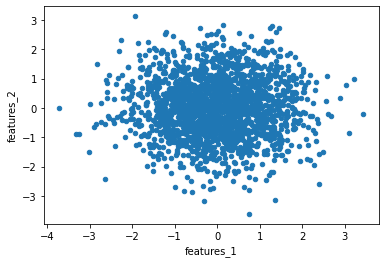

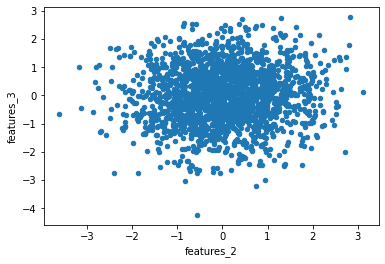

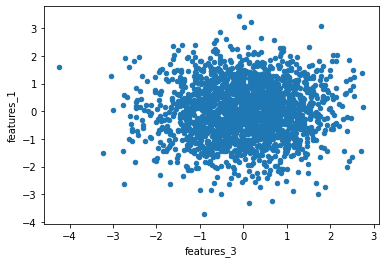

In [57]:
data = pd.read_csv('regression_generated.csv')
data.plot.scatter("features_1", "features_2",)
data.plot.scatter("features_2", "features_3",)
data.plot.scatter("features_3", "features_1",)